In [46]:
import pandas as pd
import itertools
from igraph import *

artists_df = pd.read_csv('data/artists_sample.csv')

In [47]:
artists_df.head(10)

,Id,Name,Popularity,Followers,Genres
0,43ZHCT0cAZBISjO8DG9PnE,Elvis Presley,81,6230579,"adult standards, rock-and-roll, rockabilly"
1,1Mxqyy3pSjf8kZZL4QVxS0,Frank Sinatra,84,5335732,"adult standards, easy listening, lounge"
2,5y2Xq6xcjJb2jVM54GHK3t,John Legend,82,6076119,"neo soul, pop, pop soul, r&b, urban contemporary"
3,06HL4z0CvFAxyc27GXpf02,Taylor Swift,98,48303522,pop
4,1FtBEIWAwvw5ymBen5GICR,Chlöe,69,129872,NaN
5,31W5EY0aAly4Qieq6OFu6I,A Boogie Wit da Hoodie,86,6233744,"melodic rap, rap, trap"
6,3qiHUAX7zY4Qnjx8TNUzVx,Yeat,77,180160,vapor trap
7,44IvvHRk2XF243QLA2VOa8,Stunna 4 Vegas,65,719508,trap
8,7xTKLpo7UCzXSnlH7fOIoM,Redman,69,899051,"east coast hip hop, gangster rap, hardcore hip..."
9,2VX0o9LDIVmKIgpnwdJpOJ,Erick Sermon,54,167385,"alternative hip hop, gangster rap, hardcore hi..."


In [50]:
artists_df = artists_df.dropna()

def parse_genres(genres, popularity, followers):
    return {
        "Genres": genres.split(', '),
        "Popularity": popularity,
        "Followers": followers
    }

def parse_combinations(genres, popularity, followers):
    gc = list(itertools.combinations(genres.split(', '), 2))
    if gc:
        return {
            "Genres": gc,
            "Popularity": popularity,
            "Followers": followers
        }

In [51]:
genres = [parse_genres(row[0],row[1],row[2]) for row in zip(artists_df['Genres'], artists_df['Popularity'], artists_df['Followers'])]
genres = [g for g in genres if g]

genre_combinations = [parse_combinations(row[0],row[1],row[2]) for row in zip(artists_df['Genres'], artists_df['Popularity'], artists_df['Followers'])]
genre_combinations = [c for c in genre_combinations if c]

In [52]:
print(genres[:5])

[{'Genres': ['adult standards', 'rock-and-roll', 'rockabilly'], 'Popularity': 81, 'Followers': 6230579}, {'Genres': ['adult standards', 'easy listening', 'lounge'], 'Popularity': 84, 'Followers': 5335732}, {'Genres': ['neo soul', 'pop', 'pop soul', 'r&b', 'urban contemporary'], 'Popularity': 82, 'Followers': 6076119}, {'Genres': ['pop'], 'Popularity': 98, 'Followers': 48303522}, {'Genres': ['melodic rap', 'rap', 'trap'], 'Popularity': 86, 'Followers': 6233744}]


In [53]:
edges = [{'Edge': j, 'Popularity': i['Popularity'],'Followers': i['Followers']}  for i in genre_combinations for j in i['Genres']]

In [54]:
print(edges[:5])

[{'Edge': ('adult standards', 'rock-and-roll'), 'Popularity': 81, 'Followers': 6230579}, {'Edge': ('adult standards', 'rockabilly'), 'Popularity': 81, 'Followers': 6230579}, {'Edge': ('rock-and-roll', 'rockabilly'), 'Popularity': 81, 'Followers': 6230579}, {'Edge': ('adult standards', 'easy listening'), 'Popularity': 84, 'Followers': 5335732}, {'Edge': ('adult standards', 'lounge'), 'Popularity': 84, 'Followers': 5335732}]


In [55]:
edges = pd.DataFrame.from_dict(edges)
print(edges.head())

                                Edge  Popularity  Followers
0   (adult standards, rock-and-roll)          81    6230579
1      (adult standards, rockabilly)          81    6230579
2        (rock-and-roll, rockabilly)          81    6230579
3  (adult standards, easy listening)          84    5335732
4          (adult standards, lounge)          84    5335732


In [56]:
edges = pd.DataFrame(edges.groupby(['Edge']).agg(['mean','count']))
print(edges.head())

                                                   Popularity       Followers  \
                                                         mean count      mean   
Edge                                                                            
(21st century classical, american 21st century ...       55.0     1   82609.0   
(21st century classical, choral)                         55.0     1   82609.0   
(21st century classical, contemporary choir)             55.0     1   82609.0   
(abstract beats, alternative r&b)                        54.0     1  172039.0   
(abstract beats, escape room)                            54.0     1  172039.0   

                                                          
                                                   count  
Edge                                                      
(21st century classical, american 21st century ...     1  
(21st century classical, choral)                       1  
(21st century classical, contemporary choir)           1

In [57]:
edges.columns = ['Mean Popularity','Count','Mean Followers','All Count']
print(edges.head())

                                                    Mean Popularity  Count  \
Edge                                                                         
(21st century classical, american 21st century ...             55.0      1   
(21st century classical, choral)                               55.0      1   
(21st century classical, contemporary choir)                   55.0      1   
(abstract beats, alternative r&b)                              54.0      1   
(abstract beats, escape room)                                  54.0      1   

                                                    Mean Followers  All Count  
Edge                                                                           
(21st century classical, american 21st century ...         82609.0          1  
(21st century classical, choral)                           82609.0          1  
(21st century classical, contemporary choir)               82609.0          1  
(abstract beats, alternative r&b)                    

In [58]:
edges = edges.reset_index()
print(edges.head())

                                                Edge  Mean Popularity  Count  \
0  (21st century classical, american 21st century...             55.0      1   
1                   (21st century classical, choral)             55.0      1   
2       (21st century classical, contemporary choir)             55.0      1   
3                  (abstract beats, alternative r&b)             54.0      1   
4                      (abstract beats, escape room)             54.0      1   

   Mean Followers  All Count  
0         82609.0          1  
1         82609.0          1  
2         82609.0          1  
3        172039.0          1  
4        172039.0          1  


In [45]:
edges = edges[['Edge','Mean Popularity','Count','Mean Followers']]

In [63]:
nodes = [{'Node': j, 'Popularity': i['Popularity'],'Followers': i['Followers']}  for i in genres for j in i['Genres']]
print(nodes[:5])

[{'Node': 'adult standards', 'Popularity': 81, 'Followers': 6230579}, {'Node': 'rock-and-roll', 'Popularity': 81, 'Followers': 6230579}, {'Node': 'rockabilly', 'Popularity': 81, 'Followers': 6230579}, {'Node': 'adult standards', 'Popularity': 84, 'Followers': 5335732}, {'Node': 'easy listening', 'Popularity': 84, 'Followers': 5335732}]


In [64]:
nodes = pd.DataFrame.from_dict(nodes)
nodes = pd.DataFrame(nodes.groupby(['Node']).agg(['mean','count']))
nodes.columns = ['Mean Popularity','Count','Mean Followers', 'All Count']
nodes = nodes.reset_index()
nodes = nodes[['Node','Mean Popularity','Count','Mean Followers']]

In [65]:
g = Graph()
g.add_vertices(nodes['Node'])
g.add_edges(edges['Edge'])
g.es['Weight'] = edges['Count']
g.es['Popularity'] = edges['Mean Popularity']
g.es['Followers'] = edges['Mean Followers']
g.vs['Weight'] = nodes['Count']
g.vs['Popularity'] = nodes['Mean Popularity']
g.vs['Followers'] = nodes['Mean Followers']
g.to_undirected()

In [66]:
print("Number of vertices:", g.vcount())
print("Number of edges:", g.ecount())
print("Density of the graph:", 2*g.ecount()/(g.vcount()*(g.vcount()-1)))

Number of vertices: 1315
Number of edges: 6696
Density of the graph: 0.007750403666857648


In [67]:
degrees = []
total = 0
nodelength = len(nodes)

for n in range(nodelength):
    neighbours = g.neighbors(n, mode='ALL')
    total += len(neighbours)
    degrees.append(len(neighbours))
    
print("Average degree:", total/nodelength)
print("Maximum degree:", max(degrees))
print("Vertex ID with the maximum degree:", degrees.index(max(degrees)))

Average degree: 10.18403041825095
Maximum degree: 180
Vertex ID with the maximum degree: 1038


In [68]:
degreever = sorted(zip(g.degree(),g.vs), reverse = True)
for i in degreever[:10]:
    print("Vertex: "+i[1]['name']+", Degree: "+str(i[0]))

Vertex: rock, Degree: 180
Vertex: pop, Degree: 154
Vertex: dance pop, Degree: 141
Vertex: pop rock, Degree: 101
Vertex: indie folk, Degree: 93
Vertex: art pop, Degree: 93
Vertex: indie pop, Degree: 92
Vertex: modern rock, Degree: 88
Vertex: alternative rock, Degree: 84
Vertex: pop rap, Degree: 83


In [70]:
weights = sorted(zip(g.strength(weights=g.es["Weight"]),g.vs), reverse = True)
for i in weights[:10]:
    print("Vertex: "+i[1]['name']+", Weighted Degree: "+str(i[0]))

Vertex: rock, Weighted Degree: 834.0
Vertex: dance pop, Weighted Degree: 825.0
Vertex: pop, Weighted Degree: 795.0
Vertex: mellow gold, Weighted Degree: 460.0
Vertex: classic rock, Weighted Degree: 460.0
Vertex: hip hop, Weighted Degree: 412.0
Vertex: pop rap, Weighted Degree: 398.0
Vertex: rap, Weighted Degree: 384.0
Vertex: soft rock, Weighted Degree: 382.0
Vertex: edm, Weighted Degree: 379.0


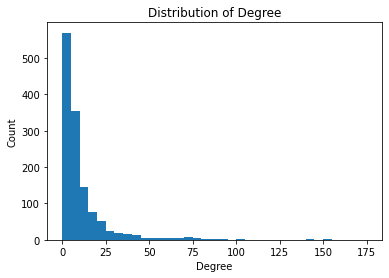

In [71]:
import matplotlib.pyplot as plt
plt.hist(g.degree(),bins = range(0,max(g.degree()),5))
plt.title("Distribution of Degree")
plt.xlabel("Degree")
plt.ylabel("Count")
plt.show()

In [72]:
result = power_law_fit(g.degree())
print(result.summary())

Fitted power-law distribution on discrete data

Exponent (alpha)  = 2.520441
Cutoff (xmin)     = 15.000000

Log-likelihood    = -958.956210

H0: data was drawn from the fitted distribution

KS test statistic = 0.052242
p-value           = 0.515608

H0 could not be rejected at significance level 0.05


In [74]:
betweenness = sorted(zip(g.betweenness(directed = False, weights=g.es["Weight"]),g.vs), reverse = True)
for i in betweenness[:10]:
    print("Vertex: "+i[1]['name']+", Betweenness: "+str(i[0]))

Vertex: rock, Betweenness: 72594.88621321625
Vertex: art pop, Betweenness: 65792.87683981401
Vertex: adult standards, Betweenness: 50192.81362932891
Vertex: pop, Betweenness: 45631.91972478186
Vertex: dance pop, Betweenness: 42780.45604972195
Vertex: classical, Betweenness: 38233.3672594795
Vertex: minimalism, Betweenness: 37116.670545273846
Vertex: compositional ambient, Betweenness: 31899.399935506375
Vertex: indie pop, Betweenness: 24567.308096979687
Vertex: alternative rock, Betweenness: 23728.96462141089


In [75]:
pgrnk = sorted(zip(g.pagerank(directed = False, weights=g.es["Weight"]),g.vs), reverse = True)
for i in pgrnk[:10]:
    print("Vertex: "+i[1]['name']+", Page Rank: "+str(i[0]))

Vertex: rock, Page Rank: 0.008892697985749109
Vertex: pop, Page Rank: 0.008391741391419768
Vertex: dance pop, Page Rank: 0.007370091948813444
Vertex: classical, Page Rank: 0.004961634805231909
Vertex: indie folk, Page Rank: 0.004940262558744335
Vertex: art pop, Page Rank: 0.004876045251111459
Vertex: indie pop, Page Rank: 0.004857420940446012
Vertex: pop rock, Page Rank: 0.00479873555000805
Vertex: modern rock, Page Rank: 0.004563800371366274
Vertex: pop rap, Page Rank: 0.0044856742254152735
